<a href="https://colab.research.google.com/github/kenan-erol/MicrobeClassification/blob/main/microbes_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install pyspark
import pyspark as spark
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 39 kB/s 
     |████████████████████████████████| 199 kB 54.9 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=dcbc74244e4ebfd4cb21d7e7956637be1aa7f909be1f2aa64afacd50d46304e9
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark
Mounted at /content/drive


In [ ]:
df = pd.read_csv(r"/content/drive/My Drive/microbes ai4all/microbes.csv")
df.head()

,Unnamed: 0,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.785,8.14,2.15,22.3,2.97,...,2.97,1.34,1.61,0.683,0.195,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.364,3.51,18.60,22.5,5.41,...,5.47,1.52,1.52,1.010,0.215,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.415,5.85,21.00,22.4,5.96,...,5.96,1.63,1.38,1.110,0.182,6.55,11.50,0.953,7.99,Spirogyra
3,3,10.10,17.9,7.29,11.10,1.470,6.30,9.94,21.9,8.81,...,8.88,2.04,2.12,0.715,0.371,10.30,12.00,2.340,7.99,Spirogyra
4,4,6.27,20.2,20.10,10.70,14.700,3.97,2.58,11.9,10.20,...,10.20,7.78,6.21,6.800,4.440,14.00,9.55,17.600,7.99,Spirogyra


In [ ]:
# Finding out how many types of microbes we are dealing with, 
  # All objects are float64, 30527 obj
df.columns # number of characteristics: 26
df = df.drop(['Unnamed: 0'], axis=1) # unneeded column, can affect training so best to remove
df.groupby('microorganisms')['Eccentricity'].count()

microorganisms
Aspergillus sp    3888
Diatom            1818
Penicillum        1080
Pithophora        1350
Protozoa          3888
Raizopus          2552
Spirogyra          611
Ulothrix          7420
Volvox            4320
Yeast             3600
Name: Eccentricity, dtype: int64

In [ ]:
# Checking for null values, which will disrupt training
print(df.isnull().sum())

Solidity           0
Eccentricity       0
EquivDiameter      0
Extrema            0
FilledArea         0
Extent             0
Orientation        0
EulerNumber        0
BoundingBox1       0
BoundingBox2       0
BoundingBox3       0
BoundingBox4       0
ConvexHull1        0
ConvexHull2        0
ConvexHull3        0
ConvexHull4        0
MajorAxisLength    0
MinorAxisLength    0
Perimeter          0
ConvexArea         0
Centroid1          0
Centroid2          0
Area               0
raddi              0
microorganisms     0
dtype: int64


In [ ]:
df

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,10.70,15.8,5.43,3.75,0.7850,8.14,2.15,22.3,2.97,10.90,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,5.60,18.3,4.14,6.16,0.3640,3.51,18.60,22.5,5.41,19.20,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,8.32,19.8,4.63,6.66,0.4150,5.85,21.00,22.4,5.96,10.20,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,10.10,17.9,7.29,11.10,1.4700,6.30,9.94,21.9,8.81,10.70,...,8.88,2.040,2.120,0.715,0.3710,10.30,12.00,2.340,7.99,Spirogyra
4,6.27,20.2,20.10,10.70,14.7000,3.97,2.58,11.9,10.20,1.22,...,10.20,7.780,6.210,6.800,4.4400,14.00,9.55,17.600,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,3.01,22.6,4.90,20.00,0.4340,1.40,19.90,22.1,18.10,9.92,...,18.60,4.350,1.350,1.710,0.5490,19.10,13.20,1.070,7.15,Ulothrix
30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.09,22.8,19.20,16.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.70,22.8,20.10,11.40,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.30,22.8,20.20,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [ ]:
%matplotlib inline 

df.columns

Index(['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi',
       'microorganisms'],
      dtype='object')

In [ ]:
#Check Distribution for Each Column for Outliers
df.describe()

,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull3,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi
count,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,...,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.000000,30527.00000,30527.000000
mean,9.677744,19.466921,3.633348,11.871832,0.420022,5.840625,11.751004,22.380901,10.919027,10.399429,...,11.046482,11.021988,1.605159,1.014179,0.829416,0.254596,11.752783,11.554286,0.80278,5.214598
std,4.063437,3.479828,2.210851,6.045135,0.875091,3.250999,6.575319,0.962906,6.093280,5.797144,...,6.089508,6.089467,1.662537,1.224326,1.152165,0.971035,6.029756,5.700637,1.17043,2.805199
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,6.570000,17.300000,2.180000,6.790000,0.093700,3.280000,6.005000,22.300000,5.690000,5.730000,...,5.790000,5.755000,0.635000,0.421000,0.253000,0.034700,6.570000,7.110000,0.21800,3.080000
50%,9.350000,20.700000,3.380000,12.000000,0.229000,5.260000,12.100000,22.600000,10.900000,10.000000,...,11.000000,11.000000,1.160000,0.745000,0.518000,0.085700,12.100000,11.200000,0.51400,5.320000
75%,12.600000,22.200000,4.580000,17.200000,0.434500,7.850000,17.200000,22.900000,15.800000,14.900000,...,15.900000,15.900000,2.070000,1.220000,0.968000,0.200000,16.900000,16.200000,0.93400,7.050000
max,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,...,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.00000,23.000000


In [ ]:
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(df)
outliers

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,BoundingBox2,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,1.47,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.34,NaN,NaN
4,NaN,NaN,20.1,NaN,14.70,NaN,NaN,11.9,NaN,NaN,...,NaN,7.78,6.21,6.8,4.440,NaN,NaN,17.60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.35,NaN,NaN,0.549,NaN,NaN,NaN,NaN,NaN
30523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   not_outliers = df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   outliers_dropped = not_outliers.dropna().reset_index()

   return outliers_dropped

df_dropped = drop_outliers_IQR(df)
df_dropped

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


,index,Solidity,Eccentricity,EquivDiameter,Extrema,FilledArea,Extent,Orientation,EulerNumber,BoundingBox1,...,ConvexHull4,MajorAxisLength,MinorAxisLength,Perimeter,ConvexArea,Centroid1,Centroid2,Area,raddi,microorganisms
0,0,10.70,15.8,5.43,3.75,0.7850,8.14,2.1500,22.3,2.97,...,2.97,1.340,1.610,0.683,0.1950,3.63,12.10,1.310,7.99,Spirogyra
1,1,5.60,18.3,4.14,6.16,0.3640,3.51,18.6000,22.5,5.41,...,5.47,1.520,1.520,1.010,0.2150,6.01,20.60,0.765,7.99,Spirogyra
2,2,8.32,19.8,4.63,6.66,0.4150,5.85,21.0000,22.4,5.96,...,5.96,1.630,1.380,1.110,0.1820,6.55,11.50,0.953,7.99,Spirogyra
3,5,9.47,18.4,4.27,14.60,0.4000,7.29,20.1000,22.5,13.60,...,13.60,1.080,1.070,0.963,0.1360,14.10,15.50,0.812,7.99,Spirogyra
4,6,13.50,19.8,4.50,17.30,0.4930,9.67,0.0334,22.2,16.80,...,16.90,1.170,0.981,0.381,0.1070,17.20,7.88,0.903,7.99,Spirogyra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25011,30521,7.63,22.9,2.30,10.30,0.0965,1.73,19.7000,22.7,9.19,...,10.30,1.710,0.227,0.412,0.0503,9.70,18.70,0.242,7.15,Ulothrix
25012,30523,5.19,22.6,2.07,19.40,0.0788,1.67,5.0900,22.8,19.20,...,20.00,1.460,0.411,0.458,0.0597,19.80,17.20,0.197,7.15,Ulothrix
25013,30524,9.21,22.7,2.07,21.00,0.0790,5.81,12.7000,22.8,20.10,...,20.10,1.060,0.257,0.319,0.0341,20.70,11.60,0.198,7.15,Ulothrix
25014,30525,8.21,22.6,1.87,20.50,0.0641,5.96,11.3000,22.8,20.20,...,20.20,1.010,0.285,0.350,0.0314,20.80,20.40,0.162,7.15,Ulothrix


In [ ]:
df2 = df.copy()

Label Encoding for Categories

In [ ]:
le_df = df.copy()
le_df_dropped = df_dropped.copy()

# Use label encoder from sklearn to change microorganism classification into numerical encoding
le = LabelEncoder()
le_df['Target'] = le.fit_transform(le_df['microorganisms'])
le_df_dropped['Target'] = le.fit_transform(le_df_dropped['microorganisms'])
le_df_dropped[['microorganisms', 'Target']].value_counts(sort=False)

microorganisms  Target
Aspergillus sp  0         3468
Diatom          1         1400
Penicillum      2         1008
Pithophora      3          768
Protozoa        4         3438
Raizopus        5         2280
Spirogyra       6          536
Ulothrix        7         6074
Volvox          8         3104
Yeast           9         2940
dtype: int64

In [ ]:
df.groupby('microorganisms')['Eccentricity'].count()

microorganisms
Aspergillus sp    3888
Diatom            1818
Penicillum        1080
Pithophora        1350
Protozoa          3888
Raizopus          2552
Spirogyra          611
Ulothrix          7420
Volvox            4320
Yeast             3600
Name: Eccentricity, dtype: int64

In [ ]:
df.groupby('microorganisms')['Eccentricity'].count()

microorganisms
Aspergillus sp    3888
Diatom            1818
Penicillum        1080
Pithophora        1350
Protozoa          3888
Raizopus          2552
Spirogyra          611
Ulothrix          7420
Volvox            4320
Yeast             3600
Name: Eccentricity, dtype: int64

In [ ]:
le_df_dropped = le_df_dropped.drop(['microorganisms'], axis=1)

I will be trying three algorithms to train this model. I believe that decision trees will be the most accurate because it is sensitive to small differences in values, making me believe it will capture the most minute of differences between one microorganism and the next. 

The other two algorithms I will be using are Naive Bayes and KNN.

I will train both the untouched and outliers-dropped version of the dataset to compare.

In [ ]:
# Import some of the packages/libraries you need for supervised learning
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import metrics 

will be training for each algorithm then deleting and leaving the results 

In [ ]:
# Define the inputs/features for the models you'll test below
# 60-40 split for original df, 70-30 split for df_dropped

x = df[['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
       'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
       'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
       'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
       'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi']].copy()

# Define the targets - what we are trying to predict or classify
# Here we are trying to predict the "rating_levels"
y = df[['microorganisms']].copy()

# We'll save 40 percent of our data for testing and use 60 percent for training 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

y_train

,microorganisms
16809,Aspergillus sp
26418,Ulothrix
5260,Pithophora
1559,Volvox
24531,Ulothrix
...,...
21708,Diatom
30219,Ulothrix
2882,Volvox
18012,Protozoa


In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# k_range = range(1,26)
# scores = {}
# scores_list = []
# for k in k_range:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(x_train,y_train.values.ravel())
#     y_pred_knn = knn.predict(x_test)
#     scores[k] = metrics.accuracy_score(y_test,y_pred_knn)
#     scores_list.append(metrics.accuracy_score(y_test,y_pred_knn))
    
# print('Accuracy:',scores_list)

# df Accuracy: [0.9751044140529032, 0.9571697649660142, 0.9376791417574318, 0.9103267545655557, 0.8856768487429367, 0.8610269429203178, 
# 0.8348210629760052, 0.8136106788960773, 0.7922365080664974, 0.7711899107362215, 0.7625092130046679, 0.7497338465318156, 0.7405617885513062, 
# 0.7279502088281058, 0.72033412496929, 0.7108344934894767, 0.7000245680124478, 0.6845467201703382, 0.678159036933912, 0.6658750307100155, 
# 0.6562116124805504, 0.6481041683727786, 0.6415526983867005, 0.636393415772664, 0.6338547211530587] why does it drop off? it feels like it trains for each col

In [ ]:
# from sklearn.naive_bayes import GaussianNB

# # Set our machine learning algorithm type - Naive Bayes, Gaussian
# NB = GaussianNB()

# # Fit the model with our training data
# NB.fit(x_train,y_train.values.ravel())

# # Use the model to make predictions using our testing input data
# y_pred_NB = NB.predict(x_test)

# # Calculate the accuracy of the model as a percent
# accuracy = metrics.accuracy_score(y_test, y_pred_NB)
# accuracy_percentage = 100 * accuracy
# print('Accuracy: ',accuracy_percentage)

# # df: NB took very little time, 19.5 accuracy???

In [ ]:
# Import necessary package
from sklearn.tree import DecisionTreeClassifier


# This is where we set our machine learning algorithm type - Decision Tree
dectree = DecisionTreeClassifier(criterion='entropy',random_state=0) 
dectree.fit(x_train,y_train.values.ravel())

# Use the model to make predictions using our testing input data
y_pred_dectree = dectree.predict(x_test)

# Calculate the accuracy of the model as a percent
accuracy = metrics.accuracy_score(y_test, y_pred_dectree)
accuracy_percentage = 100 * accuracy
print('Accuracy: ',accuracy_percentage)

# took very little time, 97.46 (overfitting?), 97.65

Accuracy:  97.98542297928098


In [ ]:
# # Using copy of df to convert all string values (aka the categories in the data) into floats so Random Forest will run


# # Define the inputs/features for the models you'll test below
# # 60-40 split for original le_df, 70-30 split for le_df_dropped

# x = le_df[['Solidity', 'Eccentricity', 'EquivDiameter', 'Extrema', 'FilledArea',
#        'Extent', 'Orientation', 'EulerNumber', 'BoundingBox1', 'BoundingBox2',
#        'BoundingBox3', 'BoundingBox4', 'ConvexHull1', 'ConvexHull2',
#        'ConvexHull3', 'ConvexHull4', 'MajorAxisLength', 'MinorAxisLength',
#        'Perimeter', 'ConvexArea', 'Centroid1', 'Centroid2', 'Area', 'raddi']]

# # Define the targets - what we are trying to predict or classify
# # Here we are trying to predict the "rating_levels"
# y = le_df[['Target']]

# # We'll save 40 percent of our data for testing and use 60 percent for training 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40)

In [ ]:
# # Random Forest
# sc = StandardScaler()
# x_train = sc.fit_transform(x_train)
# x_test = sc.transform(x_test)

# from sklearn.ensemble import RandomForestRegressor

# regressor = RandomForestRegressor(n_estimators=20, random_state=0)
# regressor.fit(x_train, y_train)
# y_pred = regressor.predict(x_test)

# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# print(confusion_matrix(y_test,y_pred))
# print(classification_report(y_test,y_pred))
# print(accuracy_score(y_test, y_pred))

light gbm

In [ ]:
# build the lightgbm model
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(x_train, y_train)

# predict the results
y_pred=clf.predict(x_test)



/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))
# precision score


LightGBM Model accuracy score: 0.9711


In [ ]:
y_pred_train = clf.predict(x_train)
print('Training-set accuracy score: {0:0.4f}'.format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9936


In [ ]:
# loss and validation metrics here


,microorganisms
29349,Ulothrix
19054,Protozoa
15444,Aspergillus sp
18526,Protozoa
12625,Penicillum
...,...
27158,Ulothrix
1422,Volvox
4425,Volvox
17089,Aspergillus sp


In [ ]:
y_test.groupby('microorganisms').count()

""
microorganisms
Aspergillus sp
Diatom
Penicillum
Pithophora
Protozoa
Raizopus
Spirogyra
Ulothrix
Volvox


Training set accuracy is 99.38 while the test accuracy is 97.01

In [ ]:
# confusion matrix for evaluation

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# microorganisms
# Aspergillus sp    3888
# Diatom            1818
# Penicillum        1080
# Pithophora        1350
# Protozoa          3888
# Raizopus          2552
# Spirogyra          611
# Ulothrix          7420
# Volvox            4320
# Yeast             3600

microorganisms_arr = ['Aspergillus sp','Diatom','Penicillum','Pithophora','Protozoa','Raizopus','Spirogyra','Ulothrix','Volvox','Yeast']\

sns_col_name, sns_ind = [], []
for i in microorganisms_arr:
  col_name_str, ind_name_str = "Actual " + i, "Predicted " + i
  sns_col_name.append(col_name_str)
  sns_ind.append(ind_name_str)

Confusion matrix

 [[1427    5    6    3    0    6    0   65   27    3]
 [   0  698    0    0    0    0    0    0    0    6]
 [   0    0  406    0    0    0    0    0    0    0]
 [  12    8    8  456    3    0    2   36    0    0]
 [   0    0    0    0 1569    0    0    0    0    0]
 [   0    0    0    0    0 1041    0    0    0    0]
 [   2    5    0    4    1    0  211   32    3    6]
 [  22    2    2    2    8    0    0 2839   28   22]
 [   0    0    0    0    0    0    0    0 1786    0]
 [   4    3    0    0    0    0    0   17    0 1425]]

True Positives(TP) =  1427

True Negatives(TN) =  698

False Positives(FP) =  5

False Negatives(FN) =  0


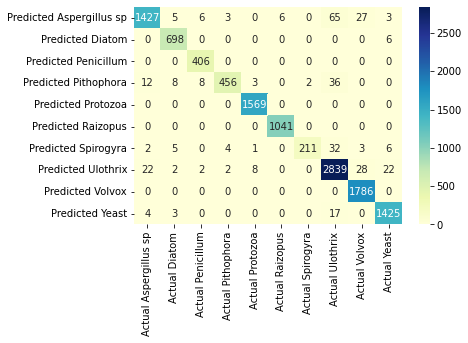

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=sns_col_name, 
                                 index=sns_ind)

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')